In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


In [143]:
Rainfall=pd.read_csv('rainfall.csv')

In [144]:
Rainfall

,Unnamed: 0,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,66144,66144,66145,1032.90,15.8,14.9,4.5,5.3,81.0,70.0,2.8,0.0,35.0,0
1,121787,121787,121788,1024.15,19.9,18.9,6.1,6.4,55.0,10.0,10.8,202.5,30.0,0
2,103761,103761,103762,1013.15,20.5,13.8,9.6,3.4,44.0,20.0,6.5,337.5,72.0,1
3,141055,141055,141056,1005.40,30.0,26.7,25.0,25.2,86.0,70.0,0.6,247.5,39.0,1
4,9304,9304,9305,1016.70,23.6,19.5,15.8,11.1,64.0,70.0,2.3,22.5,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,78148,78148,78149,1006.45,11.6,11.4,6.8,5.7,92.0,70.0,2.7,270.0,54.0,1
856,104268,104268,104269,1013.20,18.7,15.2,11.9,7.1,66.0,70.0,3.7,247.5,46.0,1
857,21396,21396,21397,1016.30,18.2,16.6,14.1,7.8,55.0,30.0,8.0,157.5,41.0,1
858,85071,85071,85072,1029.35,20.8,19.5,12.3,11.7,82.0,50.0,4.9,157.5,37.0,1


In [145]:
Rainfall.head(3)

,Unnamed: 0,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,66144,66144,66145,1032.90,15.8,14.9,4.5,5.3,81.0,70.0,2.8,0.0,35.0,0
1,121787,121787,121788,1024.15,19.9,18.9,6.1,6.4,55.0,10.0,10.8,202.5,30.0,0
2,103761,103761,103762,1013.15,20.5,13.8,9.6,3.4,44.0,20.0,6.5,337.5,72.0,1


In [146]:
Rainfall.tail(5)

,Unnamed: 0,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
855,78148,78148,78149,1006.45,11.6,11.4,6.8,5.7,92.0,70.0,2.7,270.0,54.0,1
856,104268,104268,104269,1013.20,18.7,15.2,11.9,7.1,66.0,70.0,3.7,247.5,46.0,1
857,21396,21396,21397,1016.30,18.2,16.6,14.1,7.8,55.0,30.0,8.0,157.5,41.0,1
858,85071,85071,85072,1029.35,20.8,19.5,12.3,11.7,82.0,50.0,4.9,157.5,37.0,1
859,117790,117790,117791,1011.00,16.8,13.5,12.2,12.8,97.0,70.0,0.5,247.5,37.0,1


In [147]:
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     860 non-null    int64  
 1   id             860 non-null    int64  
 2   day            860 non-null    int64  
 3   pressure       860 non-null    float64
 4   maxtemp        860 non-null    float64
 5   temparature    860 non-null    float64
 6   mintemp        860 non-null    float64
 7   dewpoint       860 non-null    float64
 8   humidity       860 non-null    float64
 9   cloud          860 non-null    float64
 10  sunshine       860 non-null    float64
 11  winddirection  860 non-null    float64
 12  windspeed      860 non-null    float64
 13  rainfall       860 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 94.2 KB


In [148]:
# Remove Extra Spaces From All Columns
Rainfall.columns

Index(['Unnamed: 0', 'id', 'day', 'pressure', 'maxtemp', 'temparature',
       'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [149]:
Rainfall.columns=Rainfall.columns.str.strip()

In [150]:
Rainfall.columns

Index(['Unnamed: 0', 'id', 'day', 'pressure', 'maxtemp', 'temparature',
       'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [151]:
# Drop Day And Id Columns
Rainfall=Rainfall.drop(columns=["id","day"])

In [152]:
Rainfall = Rainfall.drop(columns=["Unnamed: 0"])
display(Rainfall.head())

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1032.90,15.8,14.9,4.5,5.3,81.0,70.0,2.8,0.0,35.0,0
1,1024.15,19.9,18.9,6.1,6.4,55.0,10.0,10.8,202.5,30.0,0
2,1013.15,20.5,13.8,9.6,3.4,44.0,20.0,6.5,337.5,72.0,1
3,1005.40,30.0,26.7,25.0,25.2,86.0,70.0,0.6,247.5,39.0,1
4,1016.70,23.6,19.5,15.8,11.1,64.0,70.0,2.3,22.5,50.0,1


In [153]:
# Check Null Values
Rainfall.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0
windspeed,0


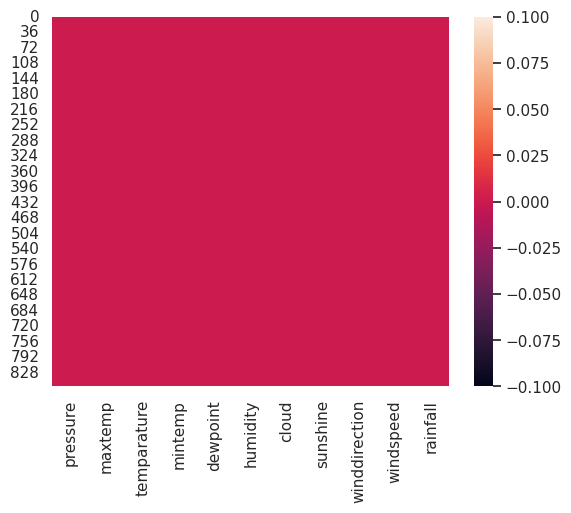

In [154]:
sns.heatmap(Rainfall.isnull())
plt.show()

In [155]:
Rainfall['rainfall'].unique()

array([0, 1])

In [156]:
Rainfall.shape

(860, 11)

# Exploratory Data Anlysis

In [157]:
sns.set(style="whitegrid")


In [158]:
Rainfall.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,1014.712791,22.850930,21.319767,13.529070,11.788023,70.825581,50.232558,6.417093,173.433140,42.779070,0.682558
std,7.132046,6.852496,6.748251,6.310552,6.003800,17.883787,26.188923,3.870906,98.766077,13.984776,0.465752
min,993.400000,8.300000,7.900000,-4.700000,-5.100000,3.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,1009.925000,17.300000,16.000000,9.000000,7.200000,61.000000,30.000000,3.100000,90.000000,33.000000,0.000000
50%,1014.950000,22.200000,20.900000,12.800000,11.100000,72.000000,60.000000,6.650000,180.000000,41.000000,1.000000
75%,1019.650000,28.200000,26.500000,18.500000,16.000000,84.000000,70.000000,9.600000,247.500000,52.000000,1.000000
max,1035.250000,41.200000,40.000000,28.600000,26.100000,100.000000,80.000000,13.700000,337.500000,109.000000,1.000000


In [159]:
Rainfall.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

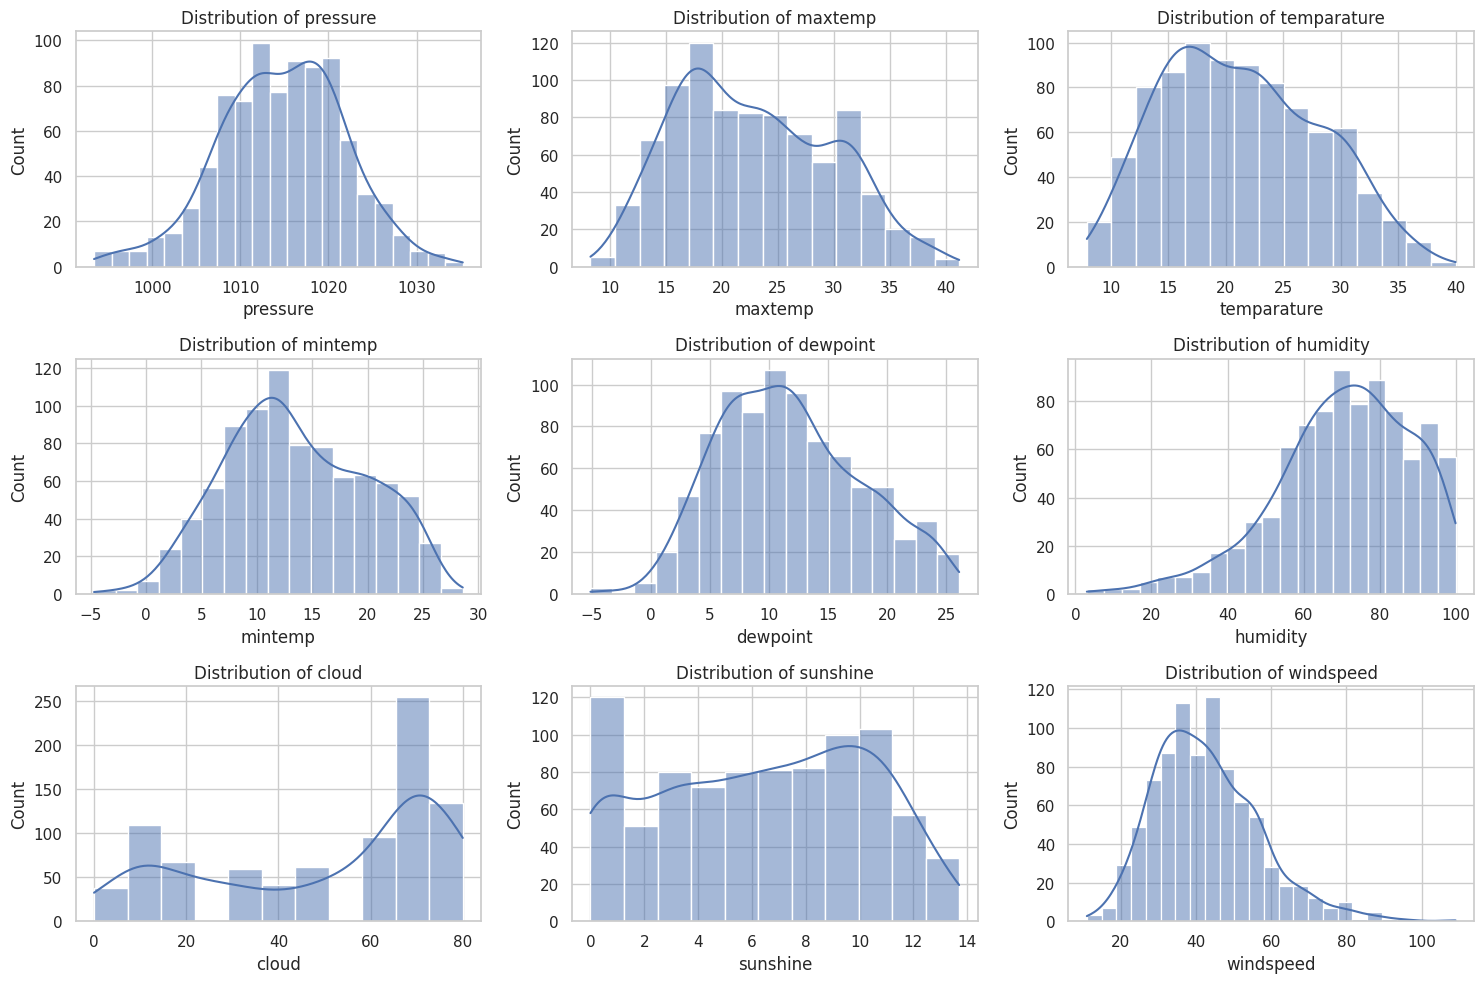

In [160]:
plt.figure(figsize=(15,10))


for i ,colummn in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data=Rainfall,x=colummn,kde=True)
    plt.title(f"Distribution of {colummn}")
plt.tight_layout()
plt.show()

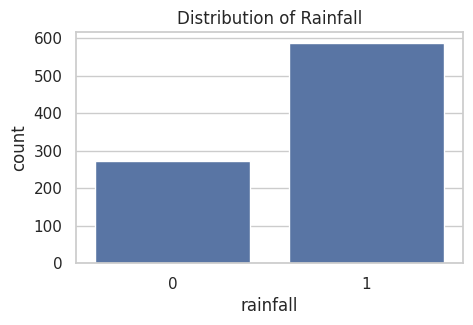

In [161]:
plt.figure(figsize=(5,3))
sns.countplot(data=Rainfall,x="rainfall")
plt.title("Distribution of Rainfall")
plt.show()

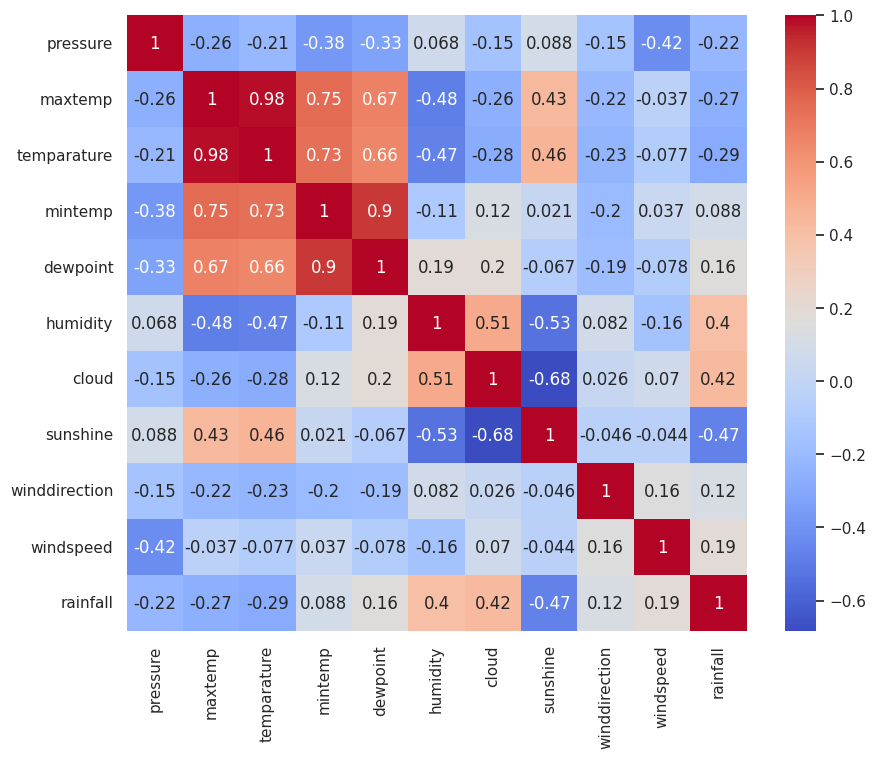

In [162]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(Rainfall.corr(),annot=True,cmap="coolwarm")
plt.show()

# **Data Preprocessing Step For Machine Learning Model**

In [163]:
# Drop highly correlated columns
Rainfall=Rainfall.drop(columns=["maxtemp","temparature","mintemp"])

In [164]:
Rainfall.head(5)

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1032.90,5.3,81.0,70.0,2.8,0.0,35.0,0
1,1024.15,6.4,55.0,10.0,10.8,202.5,30.0,0
2,1013.15,3.4,44.0,20.0,6.5,337.5,72.0,1
3,1005.40,25.2,86.0,70.0,0.6,247.5,39.0,1
4,1016.70,11.1,64.0,70.0,2.3,22.5,50.0,1


In [165]:
Rainfall['rainfall'].value_counts()

,count
rainfall,
1,587
0,273


In [166]:
# Seprate majority and minority class
majority=Rainfall[Rainfall['rainfall']==1]
minority=Rainfall[Rainfall['rainfall']==0]

In [167]:
print(majority.shape)
print(minority.shape)

(587, 8)
(273, 8)


In [168]:
# downsampling majority class to match monority class
from sklearn.utils import resample
majority_downsampled=resample(majority,replace=False,n_samples=len(minority),random_state=41)


In [169]:
print(majority_downsampled.shape)

(273, 8)


In [170]:
from os import major
majority_downsampled=pd.concat([minority,majority_downsampled])

In [171]:
majority_downsampled.shape

(546, 8)

In [172]:
# Suffeling the final dataframe
majority_downsampled=majority_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)


In [173]:
majority_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1020.55,5.9,60.0,60.0,3.0,202.5,39.0,1
1,1021.45,6.8,46.0,10.0,9.9,45.0,37.0,0
2,1004.45,24.2,95.0,80.0,0.1,292.5,37.0,1
3,1016.85,18.0,80.0,70.0,6.9,135.0,37.0,0
4,1016.55,13.2,96.0,80.0,5.5,247.5,31.0,1


In [174]:
majority_downsampled['rainfall'].value_counts()

,count
rainfall,
1,273
0,273


In [175]:
# Spilit data into train and test data
X=majority_downsampled.drop(columns=["rainfall"])
y=majority_downsampled["rainfall"]


In [176]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0     1020.55       5.9      60.0   60.0       3.0          202.5       39.0
1     1021.45       6.8      46.0   10.0       9.9           45.0       37.0
2     1004.45      24.2      95.0   80.0       0.1          292.5       37.0
3     1016.85      18.0      80.0   70.0       6.9          135.0       37.0
4     1016.55      13.2      96.0   80.0       5.5          247.5       31.0
..        ...       ...       ...    ...       ...            ...        ...
541   1011.80      14.9      49.0   30.0      12.1           67.5       37.0
542   1031.10       1.2      55.0    0.0       9.5            0.0       28.0
543   1029.80       4.7      75.0   20.0       5.5          337.5       28.0
544   1000.35      20.1      87.0   80.0      10.2           67.5       30.0
545   1026.50       6.9      77.0   70.0       4.9            0.0       43.0

[546 rows x 7 columns]


In [177]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
541    0
542    0
543    0
544    1
545    0
Name: rainfall, Length: 546, dtype: int64


In [178]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
X_train

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
93,1010.20,11.7,20.0,70.0,2.1,247.5,43.0
335,1021.65,15.1,70.0,70.0,3.3,180.0,44.0
412,1018.45,6.1,49.0,0.0,13.5,202.5,37.0
473,1012.30,7.9,37.0,0.0,13.3,157.5,46.0
237,1017.70,4.0,49.0,10.0,12.0,112.5,39.0
...,...,...,...,...,...,...,...
71,1019.75,3.4,99.0,80.0,0.0,0.0,56.0
106,1026.45,4.8,76.0,70.0,3.5,112.5,30.0
270,998.55,3.6,74.0,70.0,1.3,0.0,50.0
435,1001.10,22.7,57.0,30.0,9.9,22.5,37.0


In [180]:
X_test

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
316,1016.00,20.5,91.0,70.0,1.8,180.0,33.0
77,1020.35,5.9,97.0,60.0,7.9,292.5,20.0
360,1012.45,2.4,76.0,50.0,6.4,315.0,59.0
90,1019.95,7.5,69.0,30.0,10.5,45.0,28.0
495,1013.10,12.8,59.0,40.0,11.6,90.0,33.0
...,...,...,...,...,...,...,...
357,1017.40,7.4,71.0,30.0,6.8,315.0,59.0
39,997.65,11.8,80.0,30.0,4.9,315.0,52.0
54,1016.05,8.5,71.0,80.0,6.5,180.0,48.0
155,1020.65,12.8,62.0,10.0,12.1,22.5,48.0


In [181]:
y_train

,rainfall
93,0
335,1
412,0
473,0
237,0
...,...
71,0
106,0
270,1
435,0


In [182]:
y_test

,rainfall
316,1
77,0
360,1
90,0
495,1
...,...
357,1
39,1
54,1
155,0


In [183]:
from ast import Param
Rainfall_model_random_forest=RandomForestClassifier(random_state=42)
Param_grid_Rainfall_model_random_forest={
    "n_estimators":[50,100,200],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
}

# Model Training

In [184]:
# Hyperparametre tuning using gridsearch cv
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=Rainfall_model_random_forest,param_grid=Param_grid_Rainfall_model_random_forest,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [185]:
print("best parmas for Random Forest:",best_params)

best parmas for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [186]:
# Model Evaluation
from sklearn.model_selection import cross_val_score
Rainfall_model_random_forest_tuned = RandomForestClassifier(**best_params, random_state=42)
cv_score = cross_val_score(Rainfall_model_random_forest_tuned, X_train, y_train, cv=5)
print("cross Val Score:",cv_score)
print("Mean cross_validation score:",np.mean(cv_score))

cross Val Score: [0.77272727 0.8045977  0.8045977  0.8045977  0.72413793]
Mean cross_validation score: 0.7821316614420063


In [189]:
# test set performmance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Rainfall_model_random_forest_tuned.fit(X_train,y_train)
y_pred=Rainfall_model_random_forest_tuned.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix_result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
class_report_result=classification_report(y_test,y_pred)
print(conf_matrix_result)
print("Classification Report:")
print(class_report_result)
print("Accuracy:",accuracy)

Confusion Matrix:
[[43 16]
 [ 6 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        59
           1       0.74      0.88      0.80        51

    accuracy                           0.80       110
   macro avg       0.81      0.81      0.80       110
weighted avg       0.81      0.80      0.80       110

Accuracy: 0.8


# Predication Input Data

In [190]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [192]:
# input data
# The input data should have the same features as the training data (X_train)
# X_train columns are: ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
input_data=[1015.9, 17.8, 97, 86, 0.0, 40.0, 13.7] # Corrected input data based on X_train columns
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection','windspeed']) # Corrected column name 'windirection' to 'winddirection'
prediction=Rainfall_model_random_forest_tuned.predict(input_df)
print(prediction)

[1]


In [193]:
print(input_data)

[1015.9, 17.8, 97, 86, 0.0, 40.0, 13.7]


In [194]:
prediction=Rainfall_model_random_forest_tuned.predict(input_df)
print("Prediction Result:","☔ Rainfall ,Take An Umbrella Outside" if prediction[0]==1 else "No Rainfall")


Prediction Result: ☔ Rainfall ,Take An Umbrella Outside


In [195]:
import joblib

In [196]:
# Save the trained model
joblib.dump(Rainfall_model_random_forest_tuned, 'rainfall_prediction_model.pkl')
print("Model saved as rainfall_prediction_model.pkl")

Model saved as rainfall_prediction_model.pkl
